In [60]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

base_path = 'NWPU_lowy400'
folders = os.listdir(base_path)

X = []  # images that will be dim(1800,3(rgb)*64(height)*64(height)); features
y = []  # labels, 45 different categories


for label, folder in enumerate(folders):
    folder_path = os.path.join(base_path, folder)
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        img = Image.open(image_path)  # load with color
        X.append(np.array(img))
        y.append(label)
X = np.array(X)
y = np.array(y)


In [61]:
X = X.reshape(X.shape[0], -1)  #flatten each image to a 1D vector
X = X / 255.0  # normalize pixel values [0,1]

print(X.shape)

(18000, 12288)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) #20/80 split

# using logistic regression
clf = LogisticRegression(max_iter=1000, verbose=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\Juliu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 26.3min finished


Accuracy: 15.14%


In [64]:
from sklearn.metrics import log_loss

# Predict the probabilities on the training set
y_train_pred_proba = clf.predict_proba(X_train)

# Calculate log loss (cross-entropy loss) for the training set
train_loss = log_loss(y_train, y_train_pred_proba)

print(f"Training Log Loss: {train_loss:.4f}")


Training Log Loss: 0.1984


In [69]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

from sklearn.metrics import log_loss

y_pred_proba = clf.predict_proba(X_test)

# Calculate cross-entropy loss AKA log loss
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {loss:.4f}")



Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.17      0.18        70
           1       0.04      0.04      0.04        77
           2       0.17      0.12      0.14        85
           3       0.01      0.01      0.01        81
           4       0.07      0.09      0.08        85
           5       0.13      0.17      0.15        83
           6       0.16      0.09      0.11        69
           7       0.06      0.05      0.05        65
           8       0.16      0.19      0.18        78
           9       0.07      0.18      0.10        68
          10       0.10      0.08      0.09        78
          11       0.02      0.01      0.01        89
          12       0.64      0.73      0.69        83
          13       0.37      0.34      0.36        85
          14       0.06      0.07      0.06        86
          15       0.09      0.10      0.09        70
          16       0.04      0.03      0.03        80
  

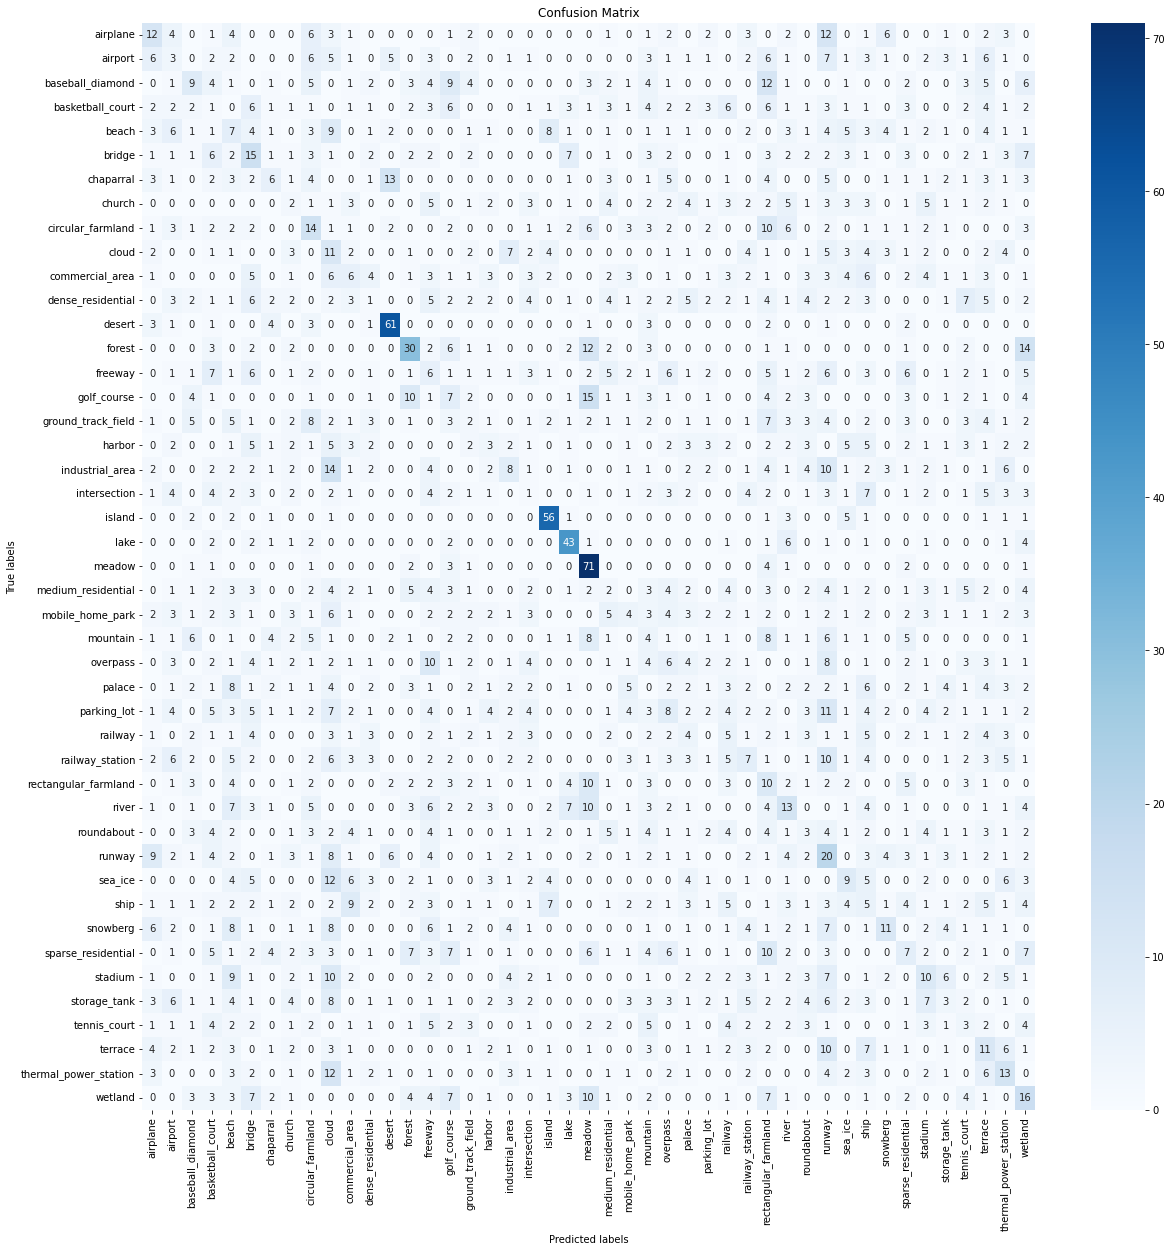

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predictions based on model on test data
y_pred = clf.predict(X_test)

#calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=folders, yticklabels=folders)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Calculate validation accuracy
accuracy = cm.diagonal().sum() / cm.sum()
print(f"Validation Accuracy: {accuracy:.4f}")


Validation Accuracy: 0.1503


In [67]:
from sklearn.metrics import log_loss

y_train_pred_proba = clf.predict_proba(X_train)
loss_train = log_loss(y_train, y_train_pred_proba)

print(f"Validation Log Loss: {loss_train:.4f}")


Training Log Loss: 0.1984
